In [53]:
#Defining all the needed values

#Those will be explicidly computed
z = var('z')

x,y = var('x,y',domain='real')
mu = var('mu',domain='complex')

#Those will have an imput as a basis
avg_m = 1
delta_m = 0
z1 = 7/10

In [54]:
#Sets of equations as seen in the theory

#Zetas

zeta = x + I*y
zeta_bar = x - I*y

#I here denotes a square root of -1, bar stands for conjugates

In [55]:
#Looking for expression n.1 which will be used to denote polynomial n.1

z_bar(z) = zeta_bar - (avg_m + delta_m)/(z1 - z) - (avg_m - delta_m)/(-z1-z)
L(z) = zeta - z - (avg_m + delta_m)/(z1 - z_bar(z)) - (avg_m - delta_m)/(-z1 - z_bar(z))

In [56]:
exp1(z) = L(z).numerator(normalize=true)

In [57]:
#Looking for expression n.2 which will be used to denote polynomial n.1

#derivative of z
derivative_z(z) = (delta_m + avg_m)/(z1 - z_bar(z))^2 + (avg_m - delta_m)/(z1+z_bar(z))^2

#and its conjugate
derivative_z_bar(z) = (delta_m + avg_m)/(z1 - z)^2 + (avg_m - delta_m)/(z1+z)^2

#magnification polynomial
magnification(z) = mu*(1-derivative_z(z)*derivative_z_bar(z))-1

In [58]:
exp2(z) = magnification(z).numerator(normalize=true)

In [59]:
def resultant(xs,ys):
    
    temp1 = exp1.subs({x:xs,y:ys})
    temp2 = exp2.subs({x:xs,y:ys})
    
    ZZI.<I> = QQ[i]
    R.<mu> = ZZI[]
    S.<z> = R[]

    poly1 = temp1.polynomial(None,ring=S)
    poly2 = temp2.polynomial(None,ring=S)

    poly3 = poly1.resultant(poly2)
    
    return poly3

In [60]:
def mag(xs,ys):
    
    test = resultant(xs,ys)
    temp(mu) = test
    
    ff = fast_callable(temp,vars=[mu])
    roots = solve([ff(mu)==0],mu,to_poly_solve="true")
    mag = sum([abs(roots[t].rhs().n()) for t in range(len(roots))])
    
    return log(mag)

In [61]:
mag(1,1)

0.415720471818891

In [62]:
x_list = []

for u in range(21):
    x_list.append(u/20)
    
for u in range(1,21):
    x_list.append(-u/20)
    
x_list.sort()

y_list = x_list

In [63]:
len(x_list)

41

In [64]:
import numpy as np

A = np.zeros([41,41])

In [65]:
for u in range(41):
    for v in range(41):
        A[u,v] = mag(x_list[u],y_list[v])

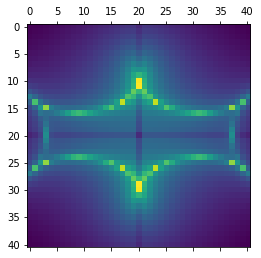

In [66]:
import matplotlib.pyplot as plt

plt.matshow(A)

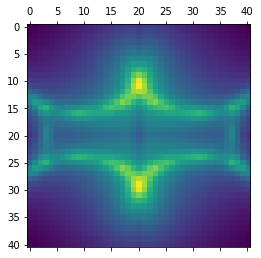

In [67]:
from scipy.ndimage import gaussian_filter

smooth_operator = gaussian_filter(A, sigma=0.75)

plt.matshow(smooth_operator)